In [2]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 16.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 27.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.1/111.1 kB 5.8 MB/s eta 0:00:00


In [4]:
!pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 26.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 18.6 MB/s eta 0:00:00


In [12]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 15.4 MB/s eta 0:00:00


In [18]:
!pip install pyarrow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 36.3 MB/s eta 0:00:0000:0100:01


In [19]:
!pip install fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 36.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 31.7 MB/s eta 0:00:00a 0:00:01


Understanding the the Raw Data, before preprocessing

In [6]:
import sys
import os
import random
import tqdm
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
#read sequence files
landmark = 'train_landmark_files'
participants = os.listdir(landmark)
print(f"participants = {len(participants)}")
for participant in participants:
    sequences = len(glob.glob(landmark +'/' + participant + '/*.parquet'))
    print(f"participant {participant} includes {sequences} sequences")

participants = 21
participant 16069 includes 4848 sequences
participant 18796 includes 3502 sequences
participant 2044 includes 4810 sequences
participant 22343 includes 4677 sequences
participant 25571 includes 3865 sequences
participant 26734 includes 4841 sequences
participant 27610 includes 4275 sequences
participant 28656 includes 4563 sequences
participant 29302 includes 4722 sequences
participant 30680 includes 3338 sequences
participant 32319 includes 4753 sequences
participant 34503 includes 4545 sequences
participant 36257 includes 4896 sequences
participant 37055 includes 4648 sequences
participant 37779 includes 4782 sequences
participant 4718 includes 3499 sequences
participant 49445 includes 4968 sequences
participant 53618 includes 4656 sequences
participant 55372 includes 4826 sequences
participant 61333 includes 4900 sequences
participant 62590 includes 4563 sequences


In [9]:
train = pd.read_csv('train.csv')

In [10]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94477 entries, 0 to 94476
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   path            94477 non-null  object
 1   participant_id  94477 non-null  int64 
 2   sequence_id     94477 non-null  int64 
 3   sign            94477 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.9+ MB


,path,participant_id,sequence_id,sign
0,train_landmark_files/26734/1000035562.parquet,26734,1000035562,blow
1,train_landmark_files/28656/1000106739.parquet,28656,1000106739,wait
2,train_landmark_files/16069/100015657.parquet,16069,100015657,cloud
3,train_landmark_files/25571/1000210073.parquet,25571,1000210073,bird
4,train_landmark_files/62590/1000240708.parquet,62590,1000240708,owie


In [13]:
import seaborn as sns
print(f"classification labels = {len(train['sign'].unique())}")

classification labels = 250


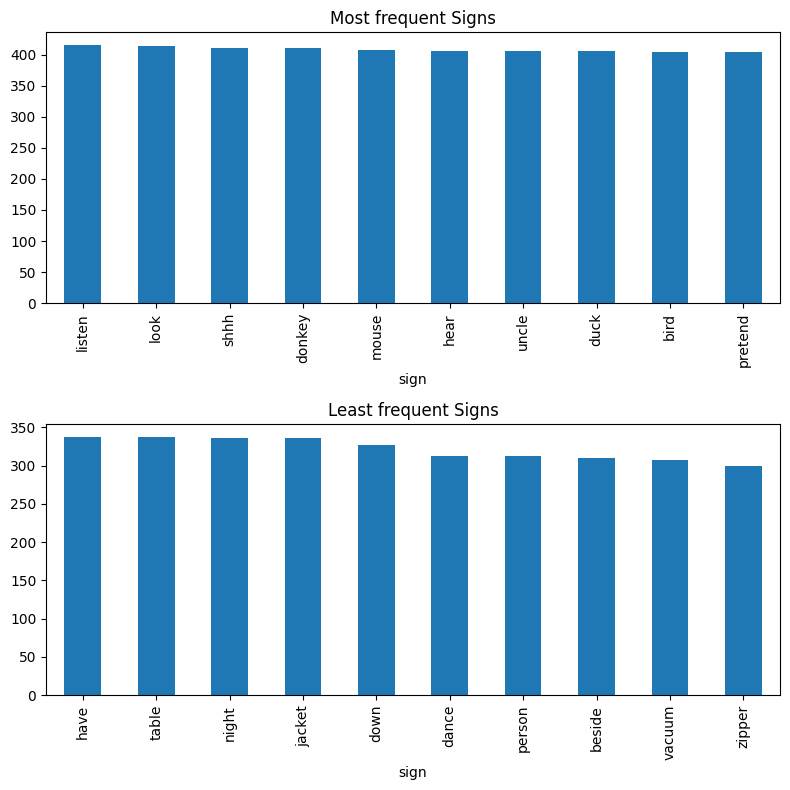

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, figsize=(8, 8))

top10 = train['sign'].value_counts()[:10]
bottom10 = train['sign'].value_counts()[-10:]

top10.plot.bar(ax=axes[0], title='Most frequent Signs')
bottom10.plot.bar(ax=axes[1], title='Least frequent Signs')

plt.tight_layout()
plt.show()

In [16]:
train['sign'].unique()

array(['blow', 'wait', 'cloud', 'bird', 'owie', 'duck', 'minemy', 'lips',
       'flower', 'time', 'vacuum', 'apple', 'puzzle', 'mitten', 'there',
       'dry', 'shirt', 'owl', 'yellow', 'not', 'zipper', 'clean',
       'closet', 'quiet', 'have', 'brother', 'clown', 'cheek', 'cute',
       'store', 'shoe', 'wet', 'see', 'empty', 'fall', 'balloon',
       'frenchfries', 'finger', 'same', 'cry', 'hungry', 'orange', 'milk',
       'go', 'drawer', 'TV', 'another', 'giraffe', 'wake', 'bee', 'bad',
       'can', 'say', 'callonphone', 'finish', 'old', 'backyard', 'sick',
       'look', 'that', 'black', 'yourself', 'open', 'alligator', 'moon',
       'find', 'pizza', 'shhh', 'fast', 'jacket', 'scissors', 'now',
       'man', 'sticky', 'jump', 'sleep', 'sun', 'first', 'grass', 'uncle',
       'fish', 'cowboy', 'snow', 'dryer', 'green', 'bug', 'nap', 'feet',
       'yucky', 'morning', 'sad', 'face', 'penny', 'gift', 'night',
       'hair', 'who', 'think', 'brown', 'mad', 'bed', 'drink', 'stay',


In [ ]:
#lets look at the dataframe of a sequence
df = pd.read_parquet('train_landmark_files/16069/100015657.parquet')
df.shape
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57015 entries, 0 to 57014
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   frame           57015 non-null  int16  
 1   row_id          57015 non-null  object 
 2   type            57015 non-null  object 
 3   landmark_index  57015 non-null  int16  
 4   x               53193 non-null  float64
 5   y               53193 non-null  float64
 6   z               53193 non-null  float64
dtypes: float64(3), int16(2), object(2)
memory usage: 2.4+ MB


,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013
...,...,...,...,...,...,...,...
57010,207,207-right_hand-16,right_hand,16,NaN,NaN,NaN
57011,207,207-right_hand-17,right_hand,17,NaN,NaN,NaN
57012,207,207-right_hand-18,right_hand,18,NaN,NaN,NaN
57013,207,207-right_hand-19,right_hand,19,NaN,NaN,NaN


In [ ]:
#lets look at the face landmarks
df_face = df[df['type'] == 'face']
df_face

,frame,row_id,type,landmark_index,x,y,z
0,103,103-face-0,face,0,0.437886,0.437599,-0.051134
1,103,103-face-1,face,1,0.443258,0.392901,-0.067054
2,103,103-face-2,face,2,0.443997,0.409998,-0.042990
3,103,103-face-3,face,3,0.435256,0.362771,-0.039492
4,103,103-face-4,face,4,0.443780,0.381762,-0.068013
...,...,...,...,...,...,...,...
56935,207,207-face-463,face,463,0.453351,0.357459,0.017679
56936,207,207-face-464,face,464,0.444545,0.358916,0.010045
56937,207,207-face-465,face,465,0.438462,0.359881,0.000768
56938,207,207-face-466,face,466,0.521029,0.358746,0.020397


In [ ]:
#left_hand landmarks
df_left_hand = df[df['type'] == 'left_hand']
df_left_hand

,frame,row_id,type,landmark_index,x,y,z
468,103,103-left_hand-0,left_hand,0,0.903850,0.686351,-2.993881e-07
469,103,103-left_hand-1,left_hand,1,0.812678,0.626594,4.002348e-03
470,103,103-left_hand-2,left_hand,2,0.728513,0.588752,-6.392229e-03
471,103,103-left_hand-3,left_hand,3,0.651862,0.586241,-2.300651e-02
472,103,103-left_hand-4,left_hand,4,0.588590,0.591355,-3.957435e-02
...,...,...,...,...,...,...,...
56956,207,207-left_hand-16,left_hand,16,0.831872,0.529663,-5.417912e-02
56957,207,207-left_hand-17,left_hand,17,0.966463,0.458484,-5.181588e-02
56958,207,207-left_hand-18,left_hand,18,0.917677,0.468401,-8.893237e-02
56959,207,207-left_hand-19,left_hand,19,0.882650,0.505012,-8.020309e-02


In [ ]:
#pose landmarks
df_pose = df[df['type'] == 'pose']
df_pose

,frame,row_id,type,landmark_index,x,y,z
489,103,103-pose-0,pose,0,0.467095,0.388947,-1.487767
490,103,103-pose-1,pose,1,0.497680,0.338767,-1.392363
491,103,103-pose-2,pose,2,0.520795,0.339825,-1.392380
492,103,103-pose-3,pose,3,0.544091,0.341803,-1.391819
493,103,103-pose-4,pose,4,0.420116,0.337973,-1.401795
...,...,...,...,...,...,...,...
56989,207,207-pose-28,pose,28,0.428183,2.413794,0.812577
56990,207,207-pose-29,pose,29,0.818527,2.455628,1.133572
56991,207,207-pose-30,pose,30,0.410917,2.487959,0.864832
56992,207,207-pose-31,pose,31,0.816683,2.542664,0.313457


In [22]:
df.describe()

,frame,landmark_index,x,y,z
count,57015.00000,57015.000000,53193.000000,53193.000000,53193.000000
mean,155.00000,202.994475,0.438283,0.457483,-0.047699
std,30.30978,146.791506,0.115117,0.268900,0.294060
min,103.00000,0.000000,-0.042923,0.248094,-2.838325
25%,129.00000,60.000000,0.372952,0.361456,-0.039124
50%,155.00000,196.000000,0.424128,0.409588,-0.009181
75%,181.00000,332.000000,0.489478,0.474334,0.025908
max,207.00000,467.000000,1.197836,2.591290,1.587503


In [23]:
#landmark types
print(df['type'].unique())

['face' 'left_hand' 'pose' 'right_hand']


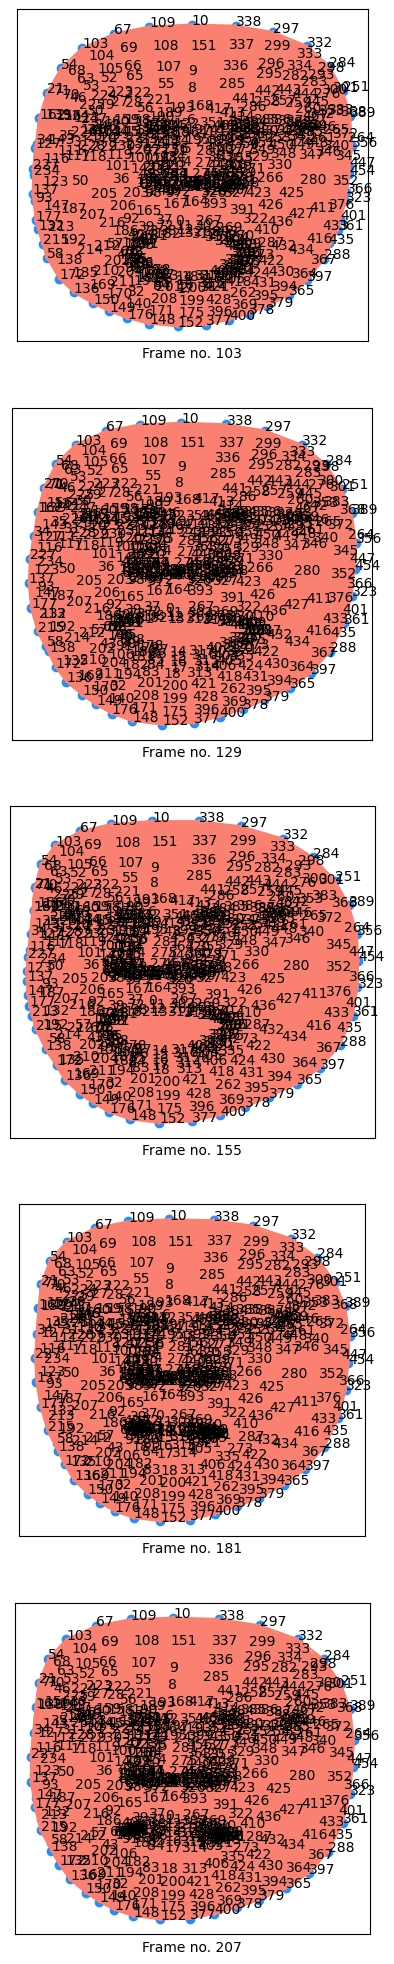

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Define edges to connect landmarks
edges = list(combinations(range(468), 2))

def plot_frame(df, frame_id, ax):
    df = df[(df.frame == frame_id) & (df.type == 'face')].sort_values(['landmark_index'])
    x = list(df.x)
    y = list(df.y)

    # Flip y-coordinates to match image orientation
    y = [-yi for yi in y]

    ax.scatter(x, y, color='dodgerblue')
    for i in range(len(x)):
        ax.text(x[i], y[i], str(i))

    for edge in edges:
        ax.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], color='salmon')

    ax.set_xlabel(f"Frame no. {frame_id}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_aspect('equal') 

def plot_frame_seq(df, frame_range, n_frames):
    frames = np.linspace(frame_range[0], frame_range[1], n_frames, dtype=int, endpoint=True)
    fig, ax = plt.subplots(n_frames, 1, figsize=(5, 25))
    for i in range(n_frames):
        plot_frame(df, frames[i], ax[i])
        
    plt.show()

# Call the function to plot the face landmarks for frame range 103 to 207 with 5 frames
plot_frame_seq(df_face, (103, 207), 5)

Checking the final_train file after the pre-processing steps

In [ ]:
import pandas as pd

#Loading the preprocessed csv file
df = pd.read_csv("final_train.csv")
df = df.drop(columns=["Unnamed: 0"]) 

df.head()

,path,label
0,train_landmark_files/26734/1000035562.parquet,25
1,train_landmark_files/28656/1000106739.parquet,232
2,train_landmark_files/16069/100015657.parquet,48
3,train_landmark_files/25571/1000210073.parquet,23
4,train_landmark_files/62590/1000240708.parquet,164


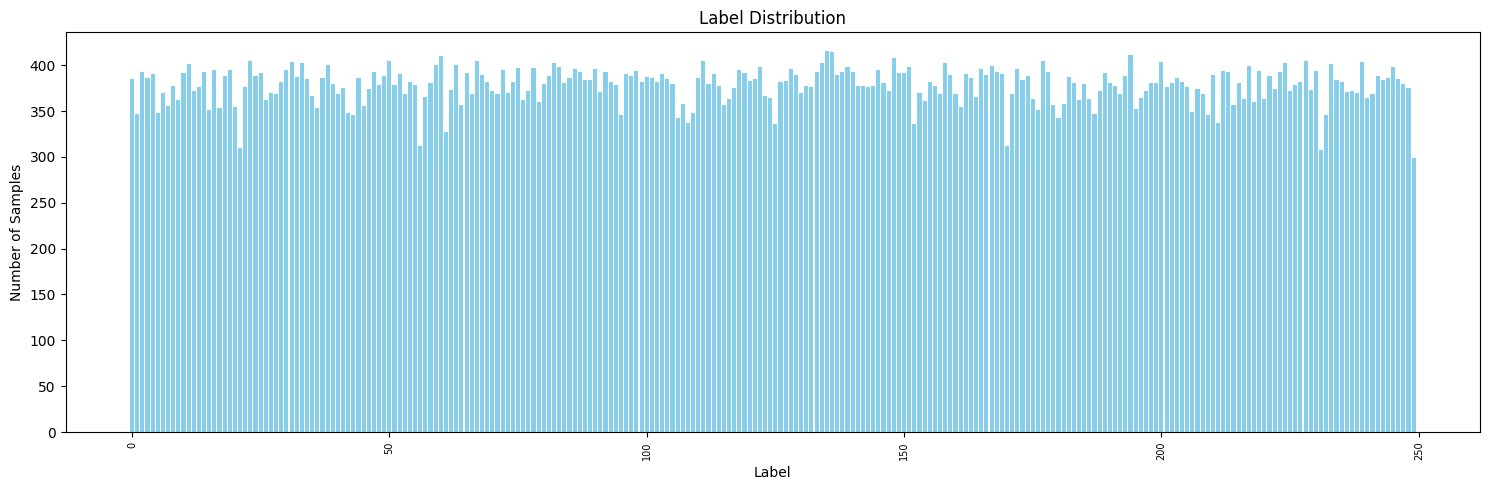

In [36]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts().sort_index()
plt.figure(figsize=(15, 5))
plt.bar(label_counts.index, label_counts.values, color='skyblue')
plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.xticks(rotation=90, fontsize=7)  # Rotate x-axis for better visibility
plt.tight_layout()
plt.show()

In [43]:
df.isnull().sum()

path     0
label    0
dtype: int64

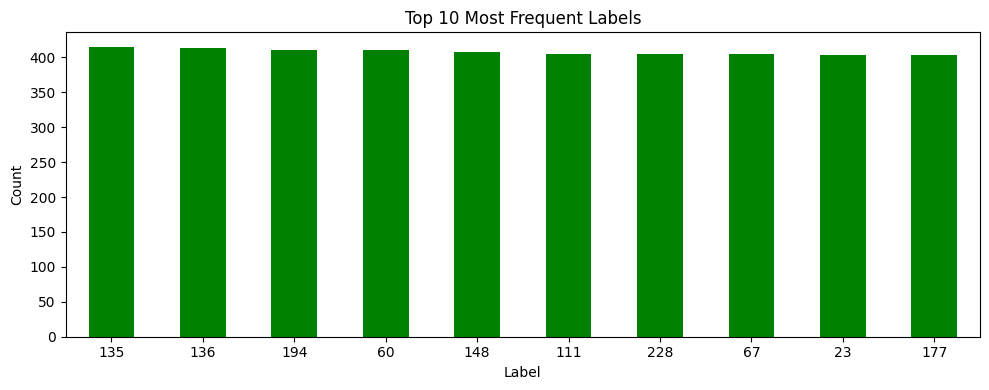

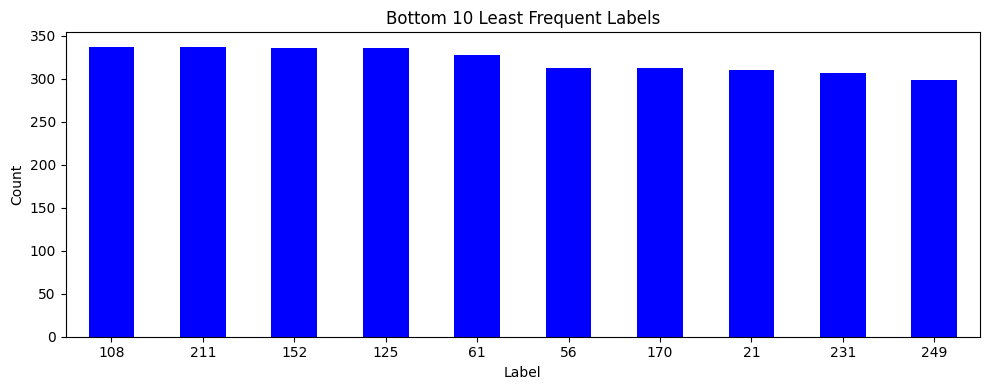

In [45]:
top_10 = df['label'].value_counts().head(10)
bottom_10 = df['label'].value_counts().tail(10)

# Plot top 10
plt.figure(figsize=(10, 4))
top_10.plot(kind='bar', color='green')
plt.title("Top 10 Most Frequent Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot bottom 10
plt.figure(figsize=(10, 4))
bottom_10.plot(kind='bar', color='blue')
plt.title("Bottom 10 Least Frequent Labels")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
#read sequence files
landmark = 'train_landmark_files'
participants = os.listdir(landmark)
print(f"participants = {len(participants)}")
for participant in participants:
    sequences = len(glob.glob(landmark +'/' + participant + '/*.parquet'))
    print(f"participant {participant} includes {sequences} sequences")

participants = 21
participant 16069 includes 4848 sequences
participant 18796 includes 3502 sequences
participant 2044 includes 4810 sequences
participant 22343 includes 4677 sequences
participant 25571 includes 3865 sequences
participant 26734 includes 4841 sequences
participant 27610 includes 4275 sequences
participant 28656 includes 4563 sequences
participant 29302 includes 4722 sequences
participant 30680 includes 3338 sequences
participant 32319 includes 4753 sequences
participant 34503 includes 4545 sequences
participant 36257 includes 4896 sequences
participant 37055 includes 4648 sequences
participant 37779 includes 4782 sequences
participant 4718 includes 3499 sequences
participant 49445 includes 4968 sequences
participant 53618 includes 4656 sequences
participant 55372 includes 4826 sequences
participant 61333 includes 4900 sequences
participant 62590 includes 4563 sequences


In [46]:
print(f"classification labels = {len(df['label'].unique())}")

classification labels = 250


In [52]:
import pyarrow.parquet as pq

sample_path = df['path'].iloc[0]
table = pq.read_table(sample_path)
landmark_df = table.to_pandas()

print("Shape:", landmark_df.shape)

Shape: (135, 176)


In [49]:
import pyarrow.parquet as pq

sample_path = df['path'].iloc[0]
table = pq.read_table(sample_path)
print("Columns:", table.column_names)
print("Num rows:", table.num_rows)

Columns: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66', 'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76', 'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83', 'x84', 'x85', 'x86', 'x87', 'y0', 'y1', 'y2', 'y3', 'y4', 'y5', 'y6', 'y7', 'y8', 'y9', 'y10', 'y11', 'y12', 'y13', 'y14', 'y15', 'y16', 'y17', 'y18', 'y19', 'y20', 'y21', 'y22', 'y23', 'y24', 'y25', 'y26', 'y27', 'y28', 'y29', 'y30', 'y31', 'y32', 'y33', 'y34', 'y35', 'y36', 'y37', 'y38', 'y39', 'y40', 'y41', 'y42', 'y43', 'y44', 'y45', 'y46', 'y47', 'y48', 'y49', 'y50', 'y51', 'y52', 'y53', 'y54', 'y55', 'y

In [51]:
from tqdm import tqdm
import pyarrow.parquet as pq

nan_report = []

for path in tqdm(df['path']):
    try:
        data = pq.read_table(path).to_pandas()
        total_nans = data.isnull().sum().sum()
        all_nan_rows = data.isnull().all(axis=1).sum()
        nan_report.append((path, total_nans, all_nan_rows))
    except Exception as e:
        nan_report.append((path, "ERROR", str(e)))

# Convert to DataFrame for review
nan_df = pd.DataFrame(nan_report, columns=["file", "total_nans", "all_nan_rows"])

100%|██████████| 94477/94477 [27:44<00:00, 56.75it/s]


In [56]:
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as pa
import os
from tqdm import tqdm
for path in tqdm(df['path'], desc="Fixing NaNs in parquet files"):
    try:
        # Read parquet
        table = pq.read_table(path)
        df_parquet = table.to_pandas()

        # Replace NaNs with -1
        df_parquet = df_parquet.fillna(-1)

        # Convert back to Arrow table and overwrite file
        table_fixed = pa.Table.from_pandas(df_parquet)
        pq.write_table(table_fixed, path)
    except Exception as e:
        print(f"Error processing {path}: {e}")

Fixing NaNs in parquet files: 100%|██████████| 94477/94477 [2:40:44<00:00,  9.80it/s]  
